In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [109]:
data = pd.read_csv("Instagram-Reach.csv")

In [110]:
data['DateColumn'] = pd.to_datetime(data['DateColumn'])

data.set_index('DateColumn', inplace=True)

In [111]:
train_size = int(len(data)*0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

In [112]:
order = (5, 1, 0)
model = ARIMA(train_data, order=order)
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [113]:
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

In [114]:
forecast_index = pd.date_range(start=data.index[-1],periods=forecast_steps,freq='D')
forecast_data = pd.DataFrame({'Instagram_Reach_Forecast': forecast}, index=forecast_index)


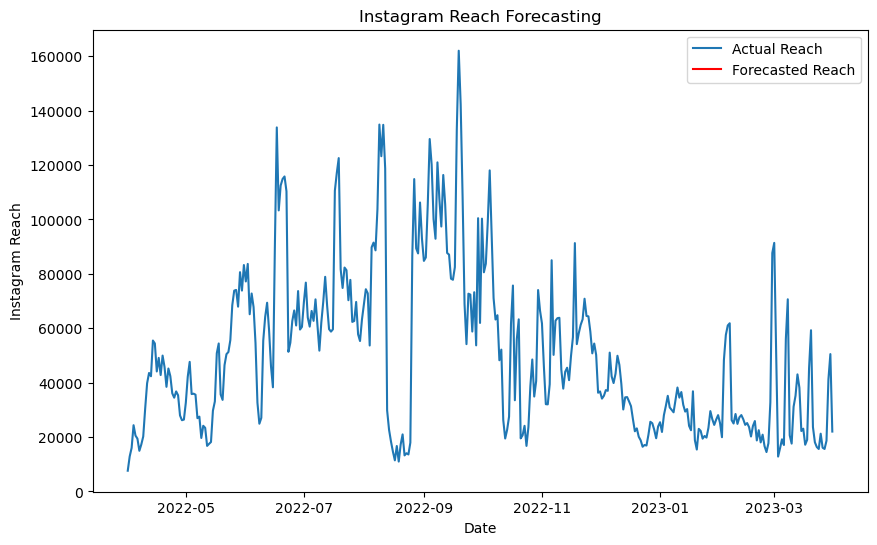

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Instagram reach'], label='Actual Reach')
plt.plot(forecast_data.index, forecast_data['Instagram_Reach_Forecast'], label='Forecasted Reach', color='red')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.title('Instagram Reach Forecasting')
plt.legend()
plt.show()